## Persistence with CheckPointers

![Screenshot 2025-09-06 025538.png](<attachment:Screenshot 2025-09-06 025538.png>)
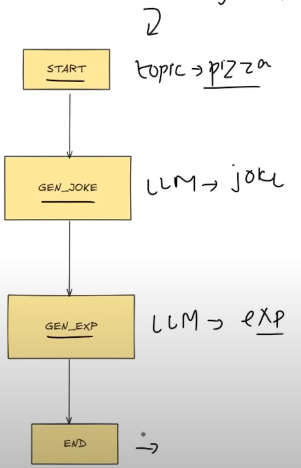

In [39]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv
from langgraph.checkpoint.memory import InMemorySaver

In [40]:
load_dotenv()

llm = ChatOpenAI()

In [41]:
class JokeState(TypedDict):
    
    topic : str
    joke : str
    explanation : str

In [42]:
def generate_joke(state : JokeState):
    
    prompt = f"generate a joke on the topic {state['topic']}"
    
    response = llm.invoke(prompt).content
    
    return {'joke': response}

In [43]:
def generate_explanation(state : JokeState):
    
    prompt = f"write an explanation for the joke - {state['joke']}"
    
    response = llm.invoke(prompt).content
    
    return {'explanation':response}

In [44]:
graph = StateGraph(JokeState)


# nodes
graph.add_node('generate_joke', generate_joke)
graph.add_node('generate_explanation', generate_explanation)


# add edges
graph.add_edge(START, 'generate_joke')
graph.add_edge('generate_joke', 'generate_explanation')
graph.add_edge('generate_explanation', END)


# checkpointer
checkpointer = InMemorySaver()

workflow = graph.compile(checkpointer = checkpointer)

In [45]:
workflow

KeyboardInterrupt: 

In [ ]:
# first generate joke on pizza

config1 = {"configurable": {"thread_id": "1"}} # to implement presistence we need a thread id
workflow.invoke({'topic':'pizza'}, config=config1)

{'topic': 'pizza',
 'joke': 'Why did the slice of pizza go to the party? Because it knew it would be a "topping" hit!',
 'explanation': 'This joke plays on the double meaning of the word "topping." In the context of pizza, a topping refers to the ingredients placed on top of the pizza. However, in the context of a party, being a "topping hit" means being a popular or successful guest at the party. The slice of pizza went to the party because it knew it would be a hit as a topping on a pizza and as a popular guest at the party.'}

In [ ]:
# the final state of workflow config1
workflow.get_state(config1)

StateSnapshot(values={'topic': 'pizza', 'joke': 'Why did the slice of pizza go to the party? Because it knew it would be a "topping" hit!', 'explanation': 'This joke plays on the double meaning of the word "topping." In the context of pizza, a topping refers to the ingredients placed on top of the pizza. However, in the context of a party, being a "topping hit" means being a popular or successful guest at the party. The slice of pizza went to the party because it knew it would be a hit as a topping on a pizza and as a popular guest at the party.'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f08aa92-7bc0-6ca3-8002-e4e5a1569855'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2025-09-05T22:39:16.922691+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f08aa92-71f6-6999-8001-acd4f7d0c461'}}, tasks=(), interrupts=())

In [ ]:
# get the intermediate stae values also
list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'pizza', 'joke': 'Why did the slice of pizza go to the party? Because it knew it would be a "topping" hit!', 'explanation': 'This joke plays on the double meaning of the word "topping." In the context of pizza, a topping refers to the ingredients placed on top of the pizza. However, in the context of a party, being a "topping hit" means being a popular or successful guest at the party. The slice of pizza went to the party because it knew it would be a hit as a topping on a pizza and as a popular guest at the party.'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f08aa92-7bc0-6ca3-8002-e4e5a1569855'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2025-09-05T22:39:16.922691+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f08aa92-71f6-6999-8001-acd4f7d0c461'}}, tasks=(), interrupts=()),
 StateSnapshot(values={'topic': 'pizza', 'joke': 'Why 

In [ ]:
for index, state in enumerate(list(workflow.get_state_history(config1))):
    print(f"{index+1}. {state}\n")

1. StateSnapshot(values={'topic': 'pizza', 'joke': 'Why did the slice of pizza go to the party? Because it knew it would be a "topping" hit!', 'explanation': 'This joke plays on the double meaning of the word "topping." In the context of pizza, a topping refers to the ingredients placed on top of the pizza. However, in the context of a party, being a "topping hit" means being a popular or successful guest at the party. The slice of pizza went to the party because it knew it would be a hit as a topping on a pizza and as a popular guest at the party.'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f08aa92-7bc0-6ca3-8002-e4e5a1569855'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2025-09-05T22:39:16.922691+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f08aa92-71f6-6999-8001-acd4f7d0c461'}}, tasks=(), interrupts=())

2. StateSnapshot(values={'topic': 'pizza', 'joke': '

In [ ]:
config2 = {"configurable": {"thread_id": "2"}} # to implement presistence we need a thread id
workflow.invoke({'topic':'pasta'}, config=config2)

{'topic': 'pasta',
 'joke': 'Why did the spaghetti blush? Because it saw the pasta sauce!',
 'explanation': 'This joke is a play on words and a pun. Spaghetti noodles are typically served with pasta sauce, such as marinara or Alfredo. In this joke, the spaghetti is said to blush, or turn red in embarrassment, because it saw the pasta sauce. The humor comes from the idea of the spaghetti blushing as if it is reacting to seeing the sauce that it is usually served with, even though in reality, spaghetti noodles cannot see or blush.'}

In [ ]:
for index, state in enumerate(list(workflow.get_state_history(config2))):
    print(f"{index+1}. {state}\n")

1. StateSnapshot(values={'topic': 'pasta', 'joke': 'Why did the spaghetti blush? Because it saw the pasta sauce!', 'explanation': 'This joke is a play on words and a pun. Spaghetti noodles are typically served with pasta sauce, such as marinara or Alfredo. In this joke, the spaghetti is said to blush, or turn red in embarrassment, because it saw the pasta sauce. The humor comes from the idea of the spaghetti blushing as if it is reacting to seeing the sauce that it is usually served with, even though in reality, spaghetti noodles cannot see or blush.'}, next=(), config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f08aa92-d079-6b59-8002-94006536e910'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2025-09-05T22:39:25.806472+00:00', parent_config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f08aa92-bf56-6d4e-8001-5332c64f1fb7'}}, tasks=(), interrupts=())

2. StateSnapshot(values={'topic': 'pasta', 'joke':

## Time Travel

Go back to joke generation checkpoin and generate a different joke on pizza

In [ ]:
# with help of checkpoint_id we will reach to the checkpoint

workflow.get_state({"configurable": {"thread_id": "2", "checkpoint_id": "f08aa92-ae63-606f-8000-947f2a5afa02"}})


StateSnapshot(values={}, next=(), config={'configurable': {'thread_id': '2', 'checkpoint_id': 'f08aa92-ae63-606f-8000-947f2a5afa02'}}, metadata=None, created_at=None, parent_config=None, tasks=(), interrupts=())

In [ ]:
# rerunning workflow from this point -> next=('generate_joke',)

# we will provide no initial state -> None
workflow.invoke(None, {"configurable": {"thread_id": "2", "checkpoint_id": "f08aa92-ae63-606f-8000-947f2a5afa02"}})

# new joke generated

EmptyInputError: Received no input for __start__

In [ ]:
# we can see 2 new stage added :
for index, state in enumerate(list(workflow.get_state_history(config2))):
    print(f"{index+1}. {state}\n")

1. StateSnapshot(values={'topic': 'pasta', 'joke': 'Why did the spaghetti go to the party? Because it heard it was going to be a pasta-tively great time!', 'explanation': 'This joke plays on the similarity in pronunciation between "pasta-tively" (a play on "positively") and "positively." The spaghetti went to the party because it heard it was going to be a positively great time, but the punchline reveals that it will be a pasta-themed party, making it a "pasta-tively" great time. This twist on words adds humor to the joke.'}, next=(), config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f08aa70-6d7e-61bf-8002-b245eb1292f9'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2025-09-05T22:24:02.746822+00:00', parent_config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f08aa70-5e2d-6d01-8001-9f4d994137c2'}}, tasks=(), interrupts=())

2. StateSnapshot(values={'topic': 'pasta', 'joke': 'Why did the spaghetti go t

### Updating State -> going back to a stage and changing it

In [ ]:
# changing topic from pizza to samosa
workflow.update_state({"configurable": {"thread_id": "2", "checkpoint_id": "1f08aa25-c463-61fc-8000-b8e34e2efe1e", "checkpoint_ns": ""}}, {'topic':'samosa'})


{'configurable': {'thread_id': '2',
  'checkpoint_ns': '',
  'checkpoint_id': '1f08aa7d-5ec1-67e9-8001-e7103d66a493'}}

In [ ]:
for index, state in enumerate(list(workflow.get_state_history(config2))):
    print(f"{index+1}. {state}\n")

1. StateSnapshot(values={'topic': 'pasta', 'joke': "Why did the spaghetti go to the party alone? Because it couldn't find a good pasta-bility date!", 'explanation': 'This joke plays on the word "pasta-bility," which sounds like "possibility," but incorporates the term "pasta" to refer to spaghetti. The joke implies that the spaghetti went to the party alone because it couldn\'t find a suitable date that was a good match for it. This pun highlights the idea that finding the right "pasta-bility" date can be challenging, even for spaghetti!'}, next=(), config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f08aa7d-8dc9-6290-8002-598f8416874b'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2025-09-05T22:29:55.099099+00:00', parent_config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f08aa7d-75f3-6bee-8001-0670cf792eac'}}, tasks=(), interrupts=())

2. StateSnapshot(values={'topic': 'pasta', 'joke': "Why did the

In [ ]:
# we will provide no initial state -> None
workflow.invoke(None, {"configurable": {"thread_id": "2", "checkpoint_id": "1f08aa25-c463-61fc-8000-b8e34e2efe1e"}}, {'topic':'samosa'})

{'topic': 'pasta',
 'joke': "Why did the spaghetti go to the party alone? Because it couldn't find a good pasta-bility date!",
 'explanation': 'This joke plays on the word "pasta-bility," which sounds like "possibility," but incorporates the term "pasta" to refer to spaghetti. The joke implies that the spaghetti went to the party alone because it couldn\'t find a suitable date that was a good match for it. This pun highlights the idea that finding the right "pasta-bility" date can be challenging, even for spaghetti!'}

In [ ]:
for index, state in enumerate(list(workflow.get_state_history(config2))):
    print(f"{index+1}. {state}\n")